<a href="https://colab.research.google.com/github/AIvantsiv070593/Colab/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import csv
import pandas as pd
import seaborn as sns
import nltk
import string

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer
from matplotlib import pyplot as plt

sns.set()

In [57]:
# Загрузка стоп-слов и пунктуации
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

def preprocess_text(text):
    words = word_tokenize(text.lower())  # Привести к нижнему регистру и токенизировать
    filtered_words = [word for word in words if word not in stop_words and word not in punctuation]
    return " ".join(filtered_words)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [58]:
csv_file = 'fake_news.csv'

df = pd.read_csv(csv_file, sep=',')
# df.head()

text_data = df['text'].map(preprocess_text).values.tolist()
label_data = df['label'].values.tolist()


REAL    3171
FAKE    3164
Name: label, dtype: int64


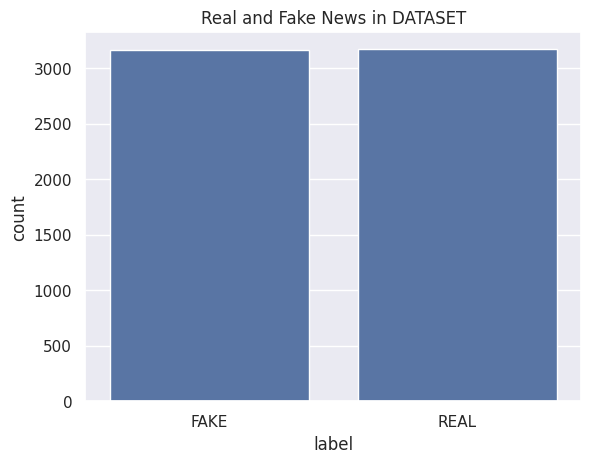

In [59]:
label_counts = df['label'].value_counts()
print(label_counts)
sns.countplot(x=df['label'])
plt.title("Real and Fake News in DATASET")
plt.show()

In [60]:
X_train, X_test, y_train, y_test = train_test_split(text_data, label_data, test_size=0.2, random_state=0)

# Преобразование текстовых данных в матрицу TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


# tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)
# feature_names = tfidf_vectorizer.get_feature_names_out()
# tfidf_scores = tfidf_matrix.toarray()[0]
# sorted_keywords = [word for _, word in sorted(zip(tfidf_scores, feature_names), reverse=True)]

# print("Ключевые слова:", sorted_keywords)

# Обучение модели классификации
classifier = PassiveAggressiveClassifier(C=0.5)
classifier.fit(X_train_tfidf, y_train)


PassiveAggressiveClassifier(C=0.5)

['REAL' 'FAKE' 'FAKE' ... 'FAKE' 'REAL' 'FAKE']
Точность модели: 93.6069455406472%


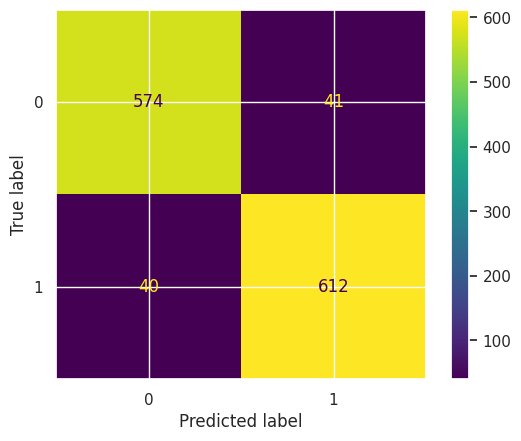

In [63]:
# Предсказание категорий для тестовых данных
y_pred = classifier.predict(X_test_tfidf)
print(y_pred)

# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy*100}%")


cm =confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()